# Business Understanding

Tanzania as a developing country, struggles with providing clean to its over 57 million population. There are already many water points set up across the country, but some are in need of repair while others have failed completely.

Tunza Jamii is a Non-Governmental-Organization in Tanzania which is interested in solving this problem, by identifying wells in need of repair later on head there and fix them.  To make this easier I will build them a classification model which help in predicting regions in need of a water pumps repair.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

# setting font size for all plots
font = {'size'   : 16}

plt.rc('font', **font)

# Data Understanding

In [2]:
# Importing the data

train_set_values = pd.read_csv('../data/Training set values.csv')
train_set_labels = pd.read_csv('../data/Training set labels.csv')

# dropping the id column in the train_set_labels
train_set_labels.drop('id', axis=1, inplace=True)

df = pd.concat([train_set_values, train_set_labels], axis=1)
pd.set_option('display.max_columns', None)

# exporting the full dataset
df.to_csv('../analysis-dfs/full-df.csv')

display(df.shape)
df.head(10)

(59400, 41)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pu

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

## Info of the data
The above dataset has a total of 59400 records and 41 columns.
The information for each column is as follows:
* amount_tsh -  amount allocated fot the construction of the water point.
* date_recorded - the date the construction of the water point began.
* funder -  the funder for the water point.
* gps_height - height above the reference ellipsoid that approximates the earth's surface.
* installer - the installer for the water point.
* longitude - geographical location of the water point.
* latitude - geographical location of the water point.
* wpt_name - the name of the water point.
* num_private - not sure.
* basin - A geographical basin.
* subvillage - geographical location.
* region - geographical location.
* region_code - geographical location (coded).
* district_code - geographical location (coded).
* lga - geographical location.
* ward - geographical location.
* population - the total population around the water point.
* public_meeting - boolean.
* recorded_by - the organization/group that entered a certain record.
* scheme_management - who manages the water point.
* scheme_name- name of one who operates the water point.
* permit - if the water point is permitted or not.
* construction_year - the construction year of the water point.
* extraction_type - the extraction type used.
* extraction_type_group - the extraction type group used.
* extraction_type_class - the extraction type class used.
* management - who is incharge of managing the water point.
* management_group - the group in charge of managing the water point.
* payment - the payment for a water point.
* payment_type - the payment type for a water point.
* water_quality - the water quality.
* quality_group - the quality of the water.
* quantity - the quantity of the water in a water point.
* quantity_group - the quantity of water in a water point.
* source - the source of the water for the water in the water point.
* source_type - the source type for the water in the water point.
* source_class - the source class for the water in the water point.
* waterpoint_type - the water point type.
* status_group - the status of the water point.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,59400.0,37115.131768,21453.128371,0.00000,18519.750000,37061.500000,55656.500000,7.424700e+04
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


Filtering out regions with non-functional water pumps and non-functional but need repair pumps

In [5]:
df.status_group.unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [6]:
df = df.loc[df.status_group != 'functional']

In [7]:
# exporting this new dataframe
df.to_csv('../analysis-dfs/df.csv')

## Exploratory Data Analysis (EDA)

### Investigating the distribution of the target class

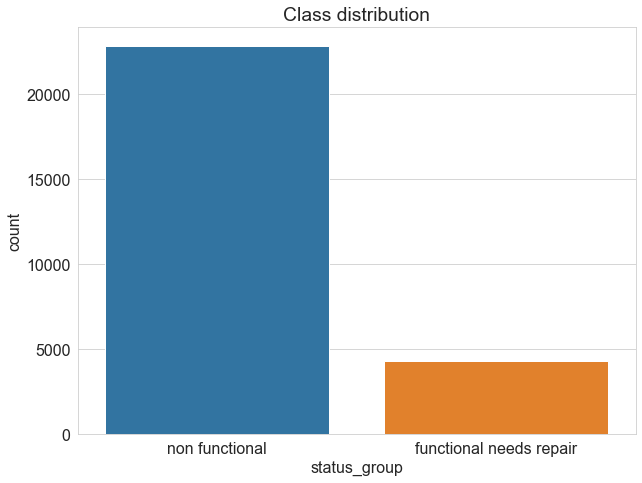

In [8]:
# Plotting a bar graph to show the distribution of the target classes if they are evenly distributed or not
fig, ax = plt.subplots(figsize=(10,7.5))
sns.countplot(data=df, x=df.status_group,  ax=ax)
ax.set_xticklabels(df.status_group.unique())
plt.title('Class distribution')
plt.show()

There seems to be a class imbalance at the target hence a oversampling or undersamplinng or over sampling technique can be used.

### Investigating the distribution null values in every column

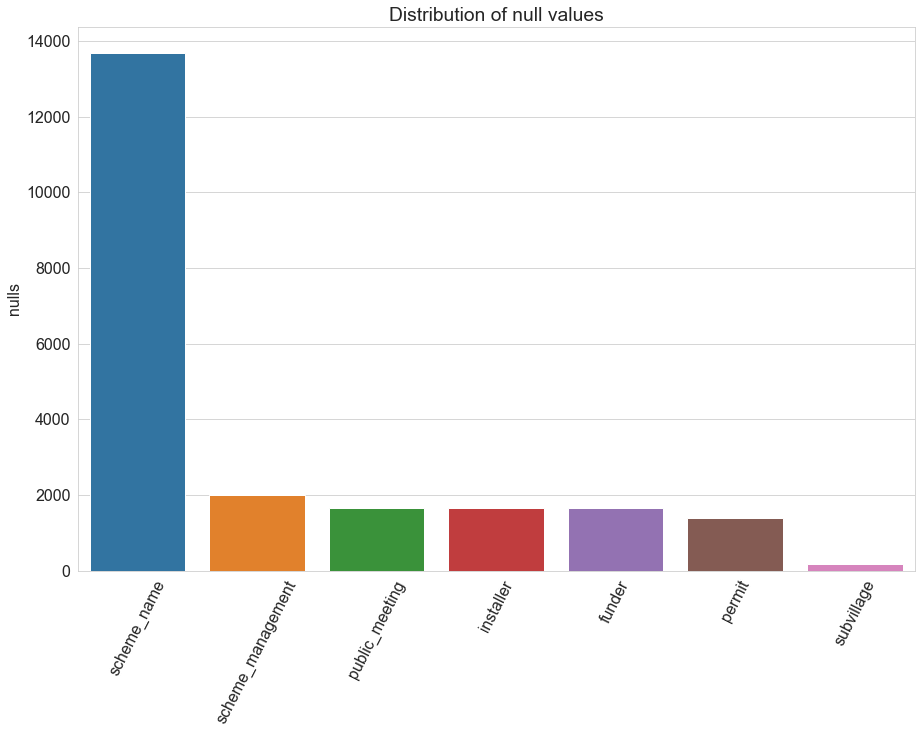

In [9]:
# showing distribution of null values in the columns in the data frame.

# creating a null df
null_values = df.isna().sum().to_frame()
null_values.columns = ['nulls']
null_values = null_values[null_values.nulls != 0].sort_values('nulls', ascending=False)
null_values

fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=null_values.index, y=null_values.nulls, ax=ax)
plt.xticks(rotation=63)
plt.title('Distribution of null values')
plt.show()

In [10]:
null_values

,nulls
scheme_name,13678
scheme_management,2004
public_meeting,1656
installer,1655
funder,1654
permit,1383
subvillage,166


From the above diagram the only 7 columns have missing values. This are fairly less since the whole dataframe has 41 columns

### Investigating the distribution of measuring metrics in the dataframe

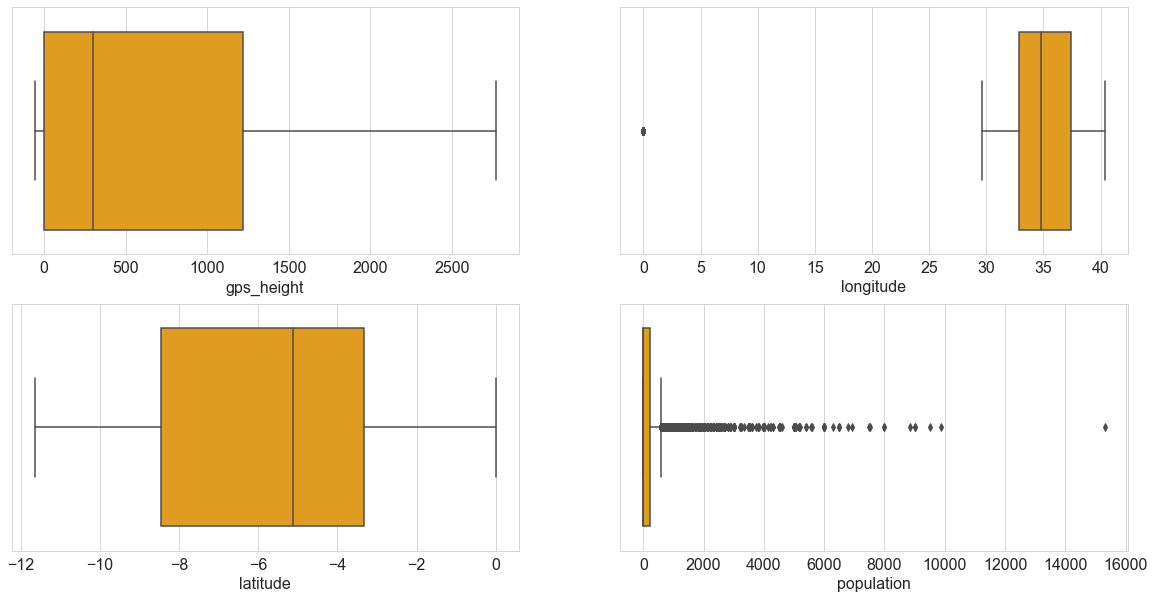

In [11]:
select_columns = ['gps_height', 'longitude', 'latitude', 'population']
nrows = 2
ncols = 2
count = 0
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,10))

for i in range(nrows):
    for j in range(ncols):
        sns.boxplot(x=df[select_columns[count]], ax=ax[i][j], color='orange')
        count+=1

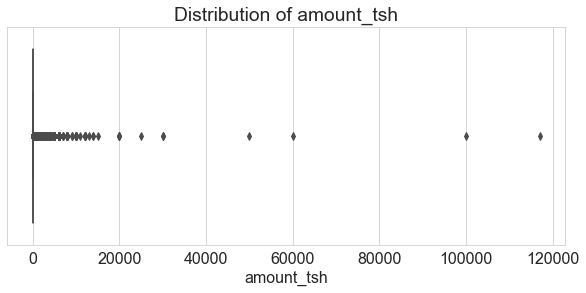

In [12]:
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x=df.amount_tsh, ax=ax, color='orange')
plt.title('Distribution of amount_tsh')
plt.show()

Columns such as longitude, amount_tsh and population are heavily affected with ouliers.

### Bivaritive Analysis

In [13]:
# function to help with grouping unique values in a certain columns and find the totals of it's effect on the target
def dataframer(column, status_condition, grouper):
    temp_df = df[[column, 'status_group']][df.status_group == status_condition].groupby(grouper).size().to_frame()
    temp_df.columns = ['Total']
    return temp_df


In [14]:
# function for merging dataframes for univaritive analysis
def df_meger(dataframes):
    temp_df = pd.concat(dataframes, axis=1).fillna(0)
    temp_df.columns = df.status_group.unique()

    return temp_df

#### Investigating if water quality affects the condition of a water point

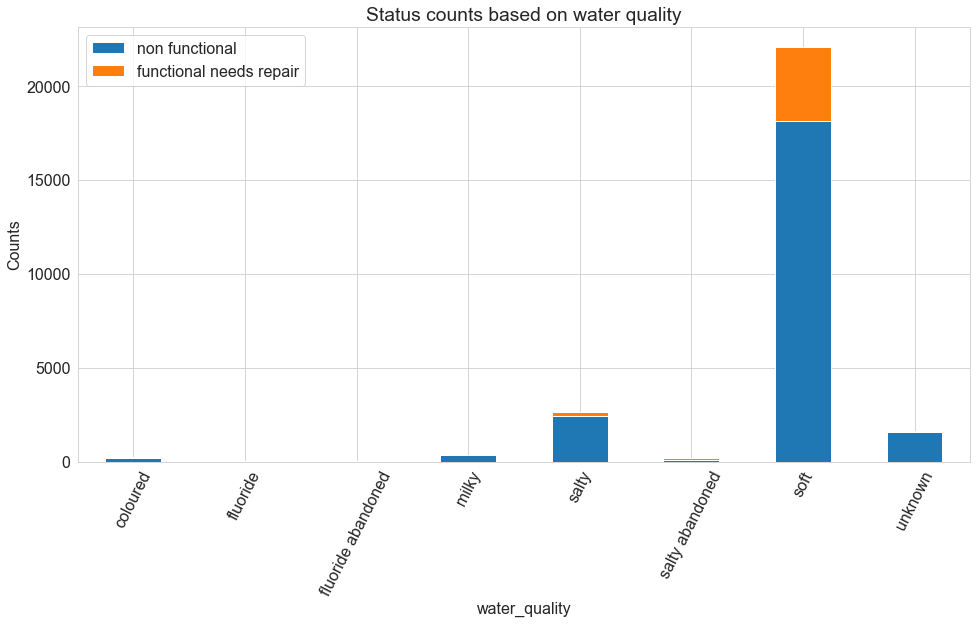

In [15]:
#  creating the dataframes
waterquality_df_non_functional = dataframer('water_quality', 'non functional', 'water_quality')
waterquality_df_needs_repair = dataframer('water_quality', 'functional needs repair', 'water_quality')

# merging the dfs
merged_waterquality_df = df_meger([waterquality_df_non_functional, waterquality_df_needs_repair])

fig, ax = plt.subplots(figsize=(16,8))
merged_waterquality_df.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('Counts')
plt.xticks(rotation=63)
plt.title('Status counts based on water quality')
plt.show()

Regions with soft water(also good water) have the highest number of non functional wells. They also have a high number of non functional wells this could be because they are completley spoilt and new ones are needed.

#### Investigatingking if water quality group affects the condition of a water point

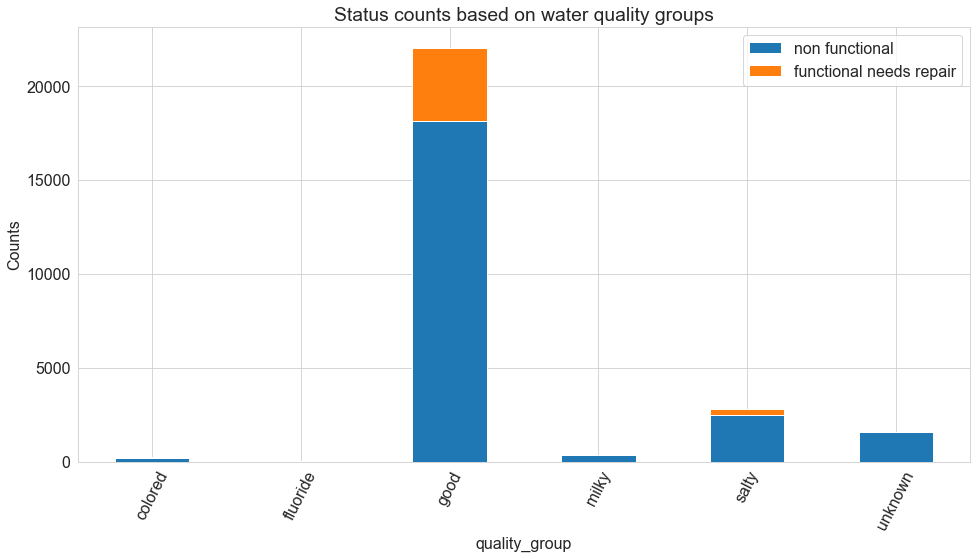

In [16]:
#  creating the dataframes
quality_group_df_non_functional = dataframer('quality_group', 'non functional', 'quality_group')
quality_group_df_needs_repair = dataframer('quality_group', 'functional needs repair', 'quality_group')

# merging the dfs
merged_quality_group_df = df_meger([quality_group_df_non_functional, quality_group_df_needs_repair])

fig, ax = plt.subplots(figsize=(16,8))
merged_quality_group_df.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('Counts')
plt.xticks(rotation=63)
plt.title('Status counts based on water quality groups')
plt.show()

Again wells with good water take the lead with the highest number of wells in need of repair. The unknown quality groups has the highest number of non functional water pumps. Maybe the government should not build pumps in regions where the water quality is not known. The salty quality group seems not to have a high number of 'to repair' pumps, maybe majority of people do not use them that much as compared to soft water.

#### Investigating if quantity affects the condition of a water point

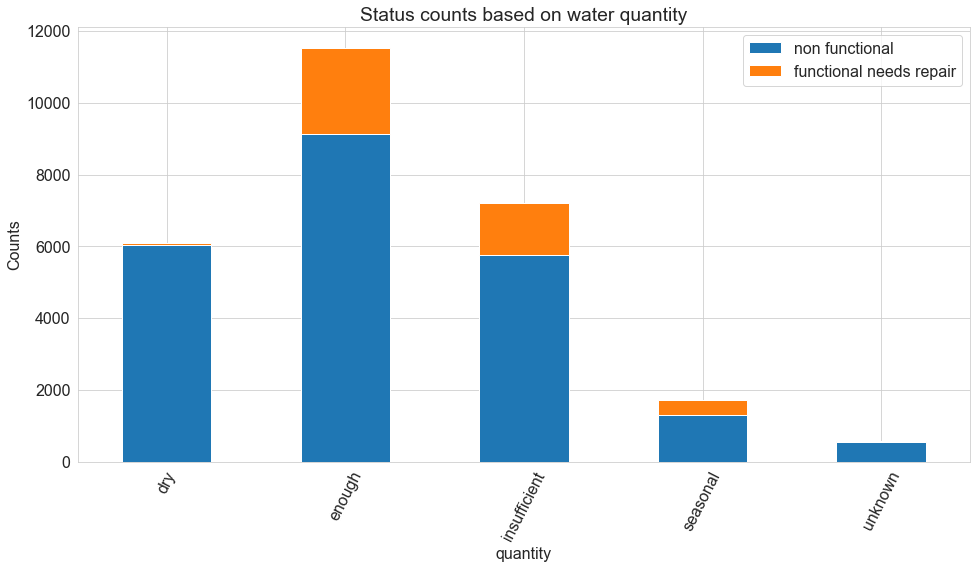

In [17]:
#  doing the same thing as with the previous
quantity_df_non_functional = dataframer('quantity', 'non functional', 'quantity')
quantity_df_needs_repair = dataframer('quantity', 'functional needs repair', 'quantity')

merged_quantity_group_df = df_meger([quantity_df_non_functional, quantity_df_needs_repair])

fig, ax = plt.subplots(figsize=(16,8))
merged_quantity_group_df.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('Counts')
plt.xticks(rotation=63)
plt.title('Status counts based on water quantity')
plt.show()

Obviously! Well in regions where water quantity is low have the highest number of non functional water pumps same applies to unknown. Also we can see that regions with enough water have the highest number of pumps in need of fixing (this may be beacuse the pumps are used to much till they wore out or there is poor management.)  Also regions with insufficient water quantity have a large number of non functional pumps, this may be because of they went dry of poor managemnt resulted to pumps being completely non functional

#### Checking if a water source affects the condition of a water point.

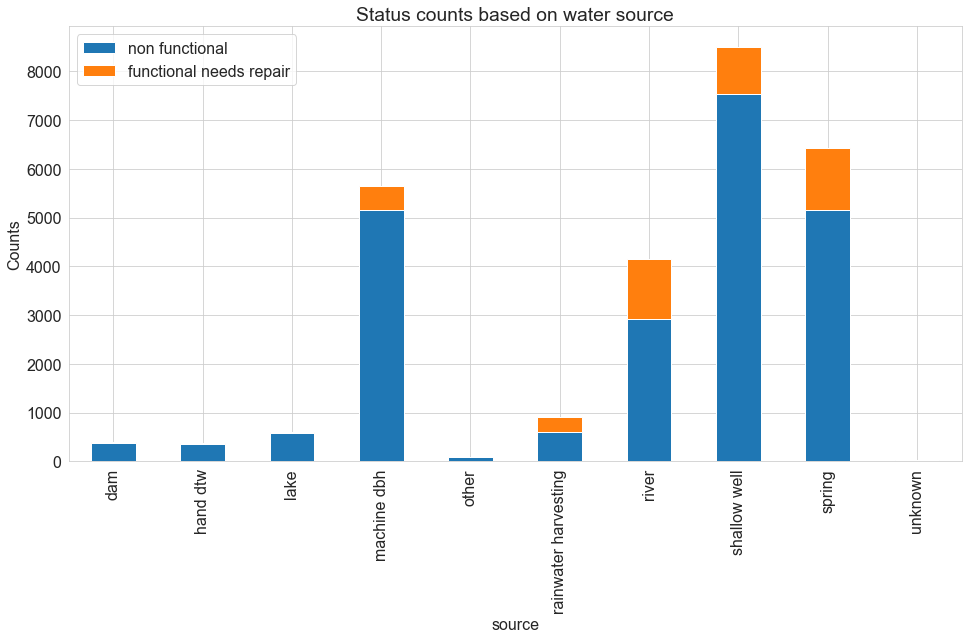

In [18]:
#  doing the same thing as with the previous
source_df_non_functional = dataframer('source', 'non functional', 'source')
source_df_needs_repair = dataframer('source', 'functional needs repair', 'source')

merged_source_group_df = df_meger([source_df_non_functional, source_df_needs_repair])

fig, ax = plt.subplots(figsize=(16,8))
merged_source_group_df.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('Counts')
plt.title('Status counts based on water source')
plt.show()

Wells near a spring have a high number of need to repair pumps (Again this could be because they are used to much, poor management or something else!). Shallow well take the lead with the most non functional wells this could be because they ran dry. Water points: dam, borehole lake and other have no repairable wells. This could be because of poor management or something else.

#### Investigating if a water source class affects the condition of a water point.

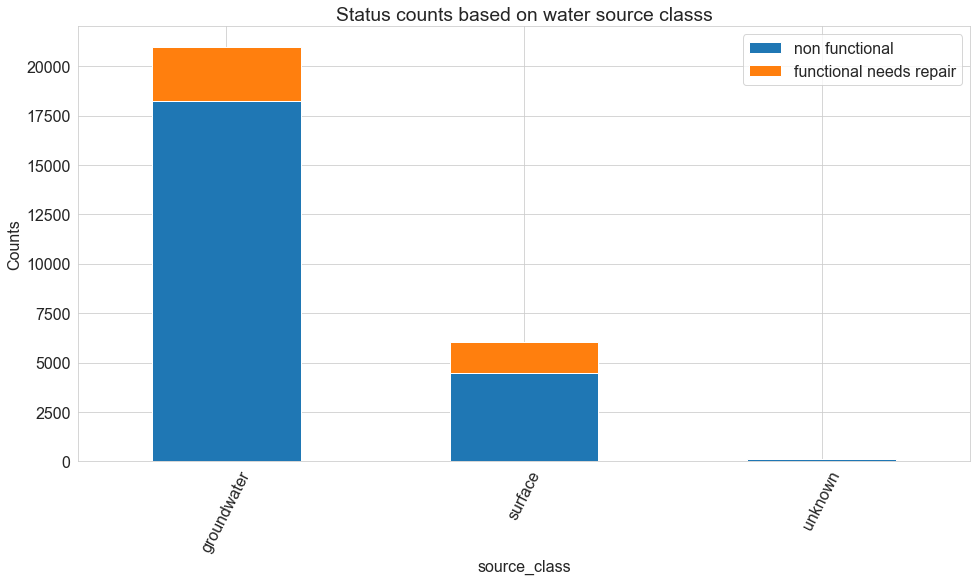

In [19]:
#  doing the same thing as with the previous
source_class_df_non_functional = dataframer('source_class', 'non functional', 'source_class')
source_class_df_needs_repair = dataframer('source_class', 'functional needs repair', 'source_class')

merged_source_class_group_df = df_meger([source_class_df_non_functional, source_class_df_needs_repair])

fig, ax = plt.subplots(figsize=(16,8))
merged_source_class_group_df.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('Counts')
plt.xticks(rotation=63)
plt.title('Status counts based on water source classs')
plt.show()

Ground water has the highest number of needing to repair wells, could be because of their demand

#### Checking if a water point type class affects the condition of a water point.

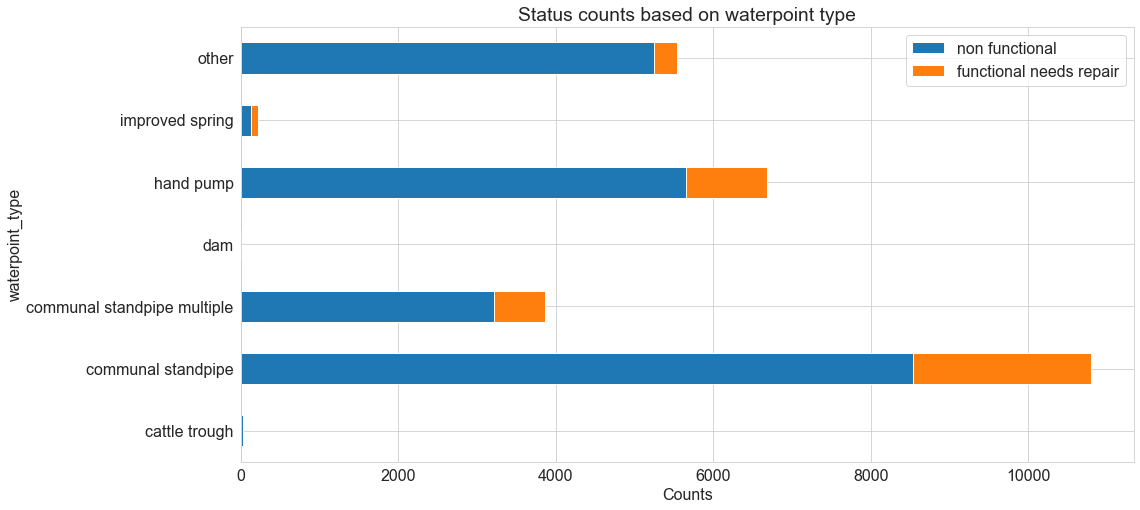

In [20]:
#  doing the same thing as with the previous
waterpoint_type_df_non_functional = dataframer('waterpoint_type', 'non functional', 'waterpoint_type')
waterpoint_type_df_needs_repair = dataframer('waterpoint_type', 'functional needs repair', 'waterpoint_type')

merged_waterpoint_type_df = df_meger([waterpoint_type_df_non_functional, waterpoint_type_df_needs_repair])

fig, ax = plt.subplots(figsize=(16,8))
merged_waterpoint_type_df.plot(kind='barh', stacked=True, ax=ax)
ax.set_xlabel('Counts')
plt.title('Status counts based on waterpoint type')
plt.show()

Communal standpipe has the highesr number of non-functional class. Water points with type class 'other' have the highest number of non-functional class.

investigating whether waterpoint type group provides more info. 

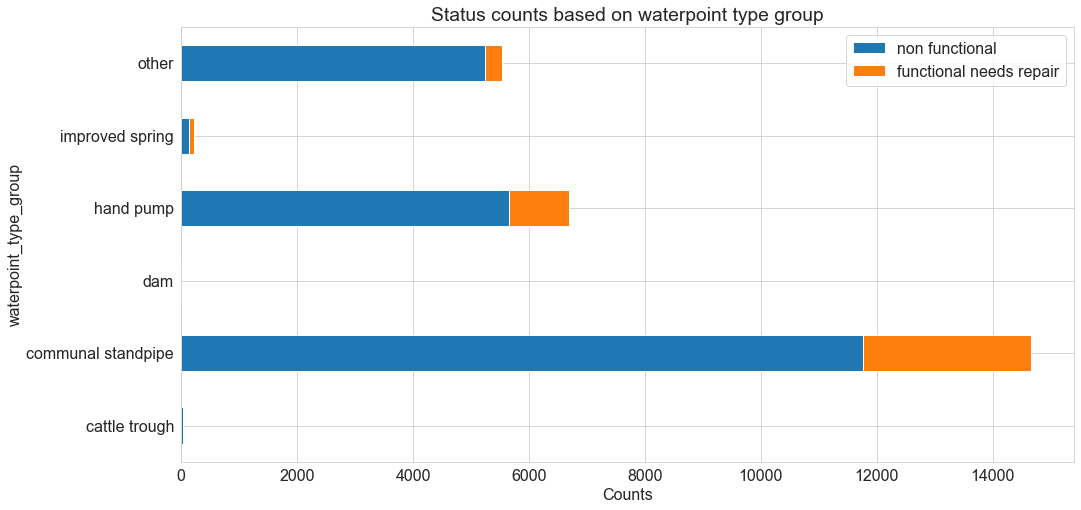

In [21]:
#  doing the same thing as with the previous
waterpoint_type_group_df_non_functional = dataframer('waterpoint_type_group', 'non functional', 'waterpoint_type_group')
waterpoint_type_group_df_needs_repair = dataframer('waterpoint_type_group', 'functional needs repair', 'waterpoint_type_group')

merged_waterpoint_type_group_df = df_meger([waterpoint_type_group_df_non_functional, waterpoint_type_group_df_needs_repair])

fig, ax = plt.subplots(figsize=(16,8))
merged_waterpoint_type_group_df.plot(kind='barh', stacked=True, ax=ax)
ax.set_xlabel('Counts')
plt.title('Status counts based on waterpoint type group')
plt.show()

Same results!

#### Checking if a water basin near a water point has an impact.

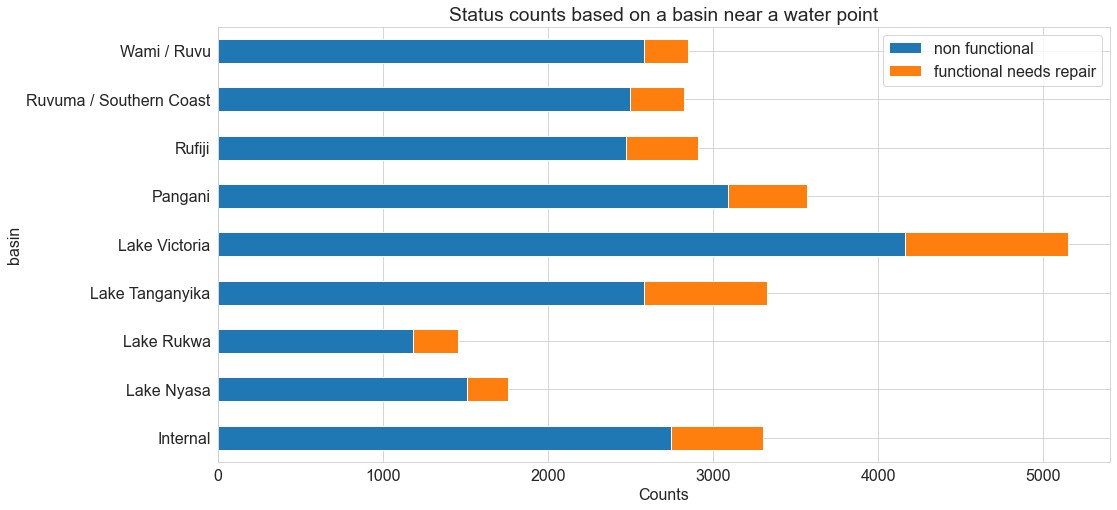

In [22]:
#  doing the same thing as with the previous
basin_df_non_functional = dataframer('basin', 'non functional', 'basin')
basin_df_needs_repair = dataframer('basin', 'functional needs repair', 'basin')

merged_basin_df_needs_df = df_meger([basin_df_non_functional, basin_df_needs_repair])

fig, ax = plt.subplots(figsize=(16,8))
merged_basin_df_needs_df.plot(kind='barh', stacked=True, ax=ax)

ax.set_xlabel('Counts')
plt.title('Status counts based on a basin near a water point')
plt.show()

Lake Victoria has the highest number of functional but needs repairing pumps. Lake: Ruvuma and Rukwa have the highest number of non - functional pumps.

### Investigating if payment has an effect on the condition of the waterpoint

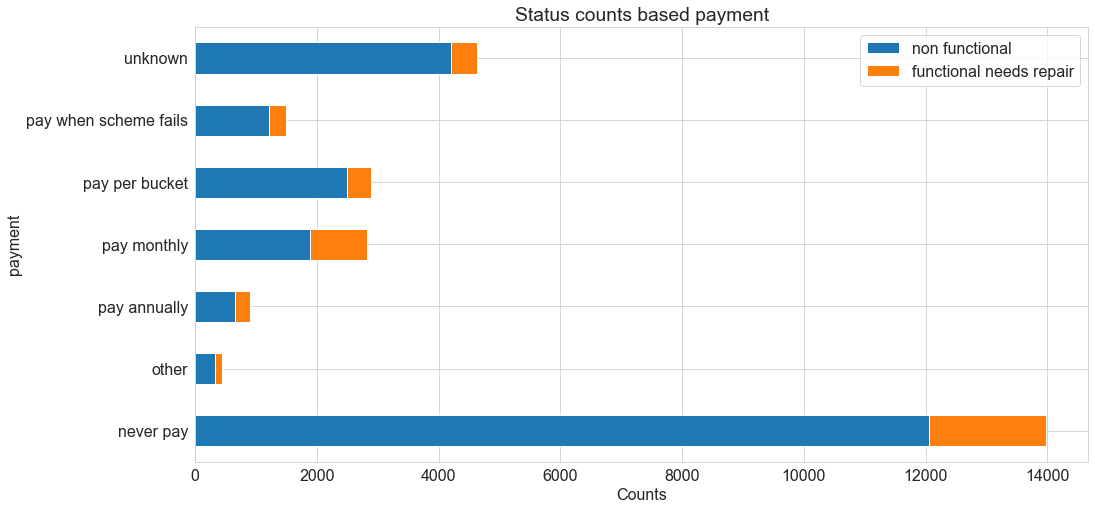

In [23]:
#  doing the same thing as with the previous
payment_df_non_functional = dataframer('payment', 'non functional', 'payment')
payment_df_needs_repair = dataframer('payment', 'functional needs repair', 'payment')

merged_payment_df = df_meger([payment_df_non_functional, payment_df_needs_repair])

fig, ax = plt.subplots(figsize=(16,8))
merged_payment_df.plot(kind='barh', stacked=True, ax=ax)
ax.set_xlabel('Counts')
plt.title('Status counts based payment')
plt.show()

It can be deduced, water points where payments are made the number of functional water pumps are higher compared to the non functional ones. 

### Investigating if construction year has an effect on the condition of the waterpoint

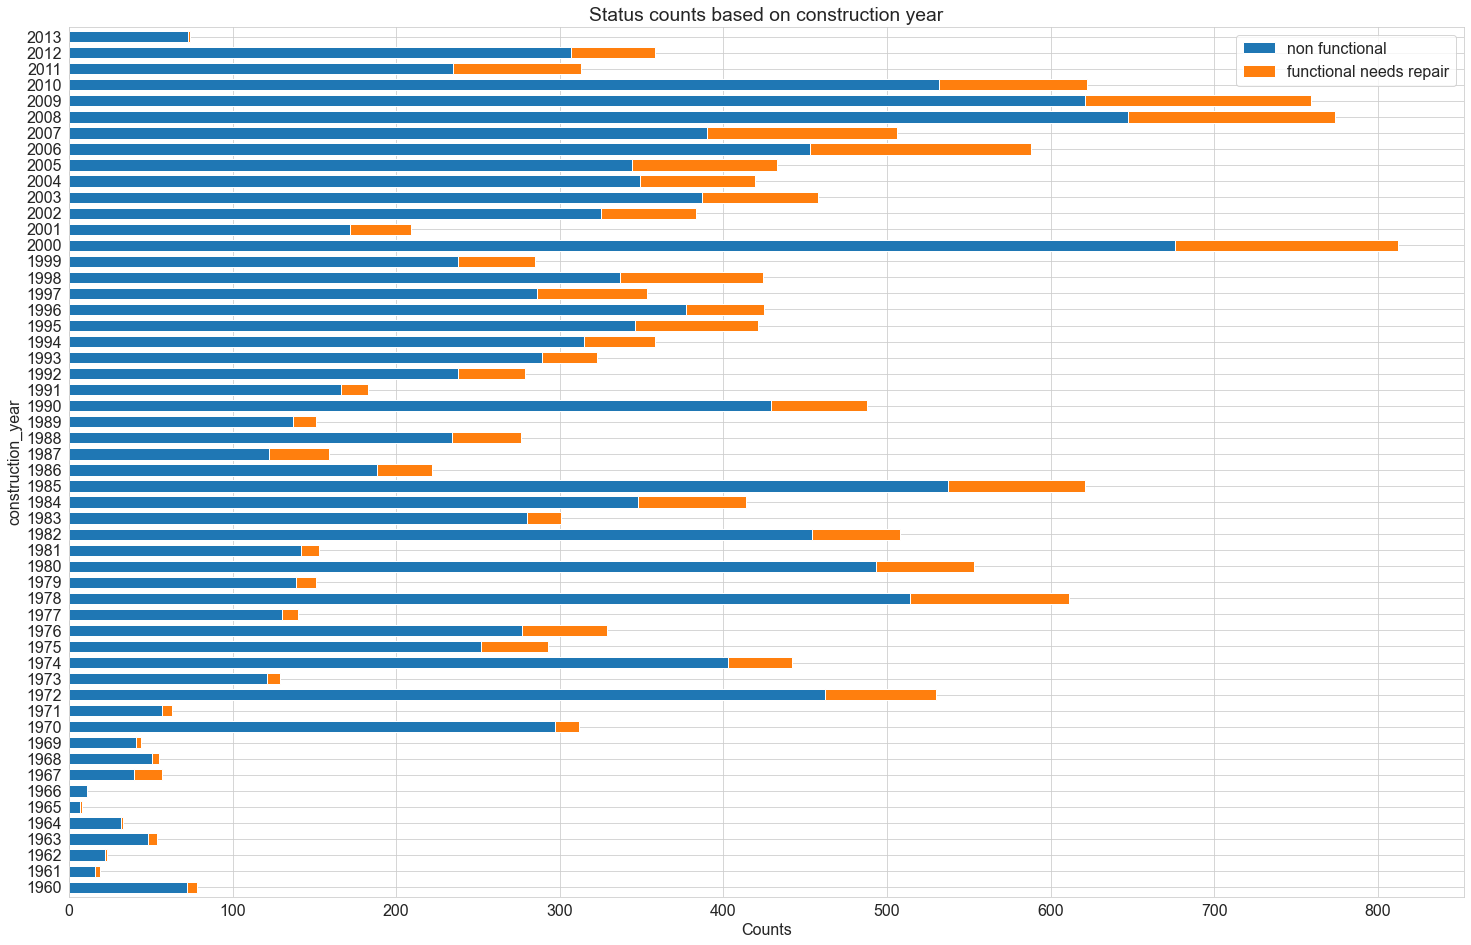

In [24]:
#  doing the same thing as with the previous
construction_year_df_non_functional = dataframer('construction_year', 'non functional', 'construction_year')
construction_year_df_needs_repair = dataframer('construction_year', 'functional needs repair', 'construction_year')

merged_construction_year_df = df_meger([construction_year_df_non_functional, construction_year_df_needs_repair])


fig, ax = plt.subplots(figsize=(25,16))
#  filtering out the year marked 0 they could be unknown years
merged_construction_year_df[merged_construction_year_df.index != 0].plot(kind='barh', stacked=True, ax=ax, width=0.7)
ax.set_xlabel('Counts')
plt.title('Status counts based on construction year')
plt.show()

From above we can see that wells built before 1991 have lots of non functional wells and very few non functional but can be repaired well. Starting 2001 and 2006-2010 have the largest number of non functional but fixable wells.

This plot seems to be missing out the years labeled 0 which could possibly mean they are unknow, below I will include them

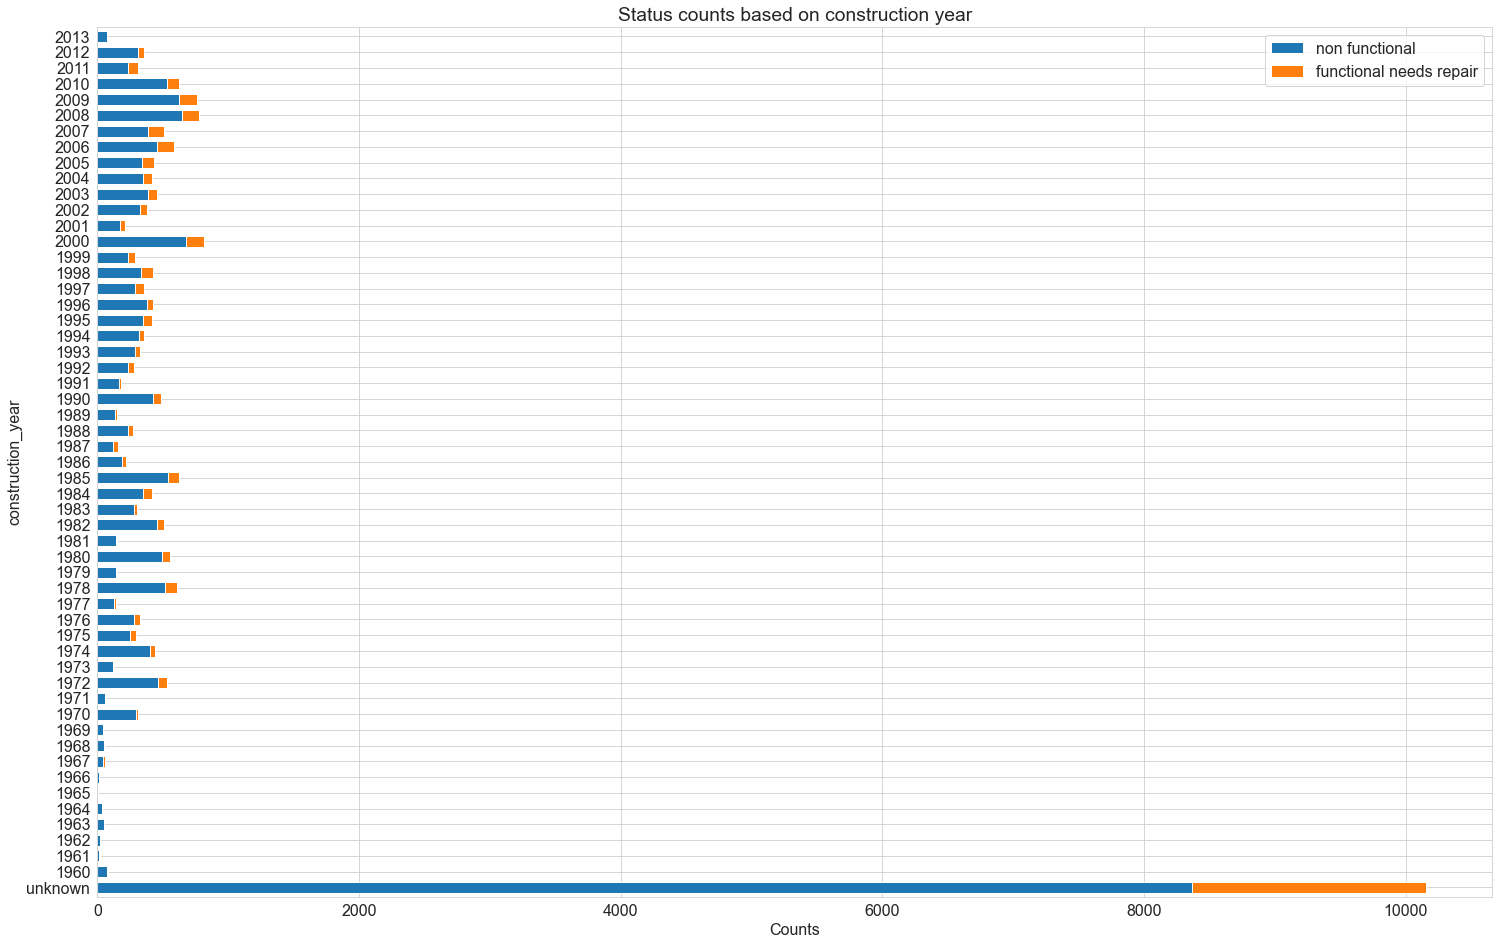

In [25]:
merged_construction_year_df.rename(index={0: 'unknown'}, inplace=True) # the unknown here means years which have value 0 in them

fig, ax = plt.subplots(figsize=(25,16))
#  filtering out the year marked 0 they could be unknown years
merged_construction_year_df[merged_construction_year_df.index != 0].plot(kind='barh', stacked=True, ax=ax, width=0.7)
ax.set_xlabel('Counts')
plt.title('Status counts based on construction year')
plt.show()

### Investigating if a region has any effect on the waterpoint status.

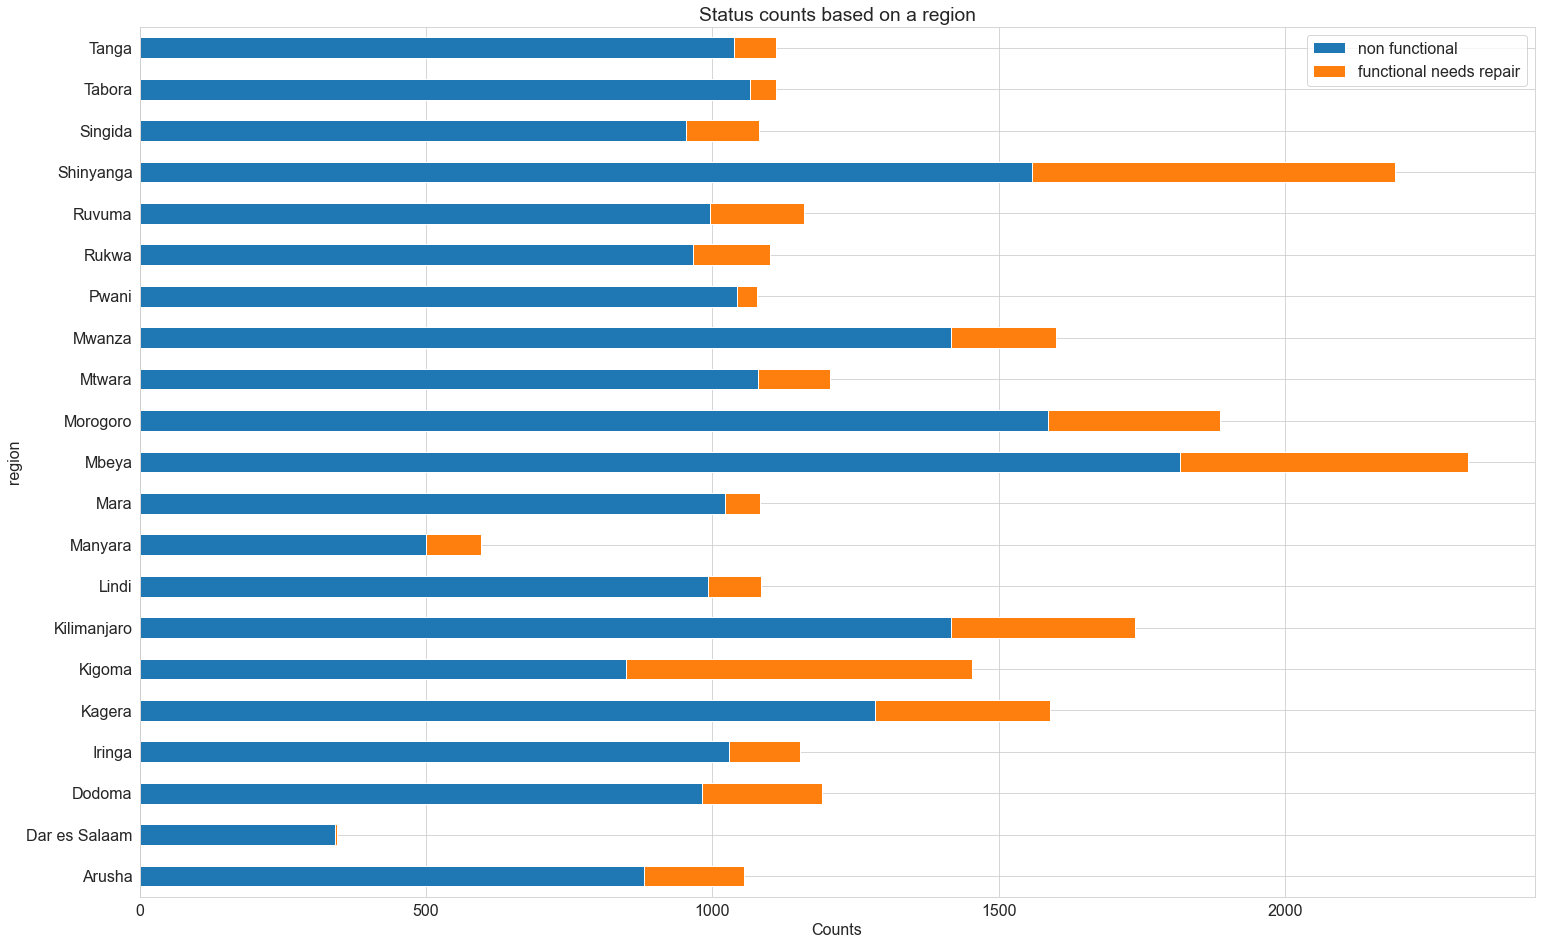

In [26]:
#  doing the same thing as with the previous
region_df_non_functional = dataframer('region', 'non functional', 'region')
region_df_needs_repair = dataframer('region', 'functional needs repair', 'region')

merged_region_df = df_meger([region_df_non_functional, region_df_needs_repair])

fig, ax = plt.subplots(figsize=(25,16))
merged_region_df.plot(kind='barh', stacked=True, ax=ax)
ax.set_xlabel('Counts')
plt.title('Status counts based on a region')
plt.show()

Shinyanga, Mbey, Kilimanjaro and Kigoma are the top 4 regions in need of well repair.

### Invsetingating if scheme management has effect on the status of a water point

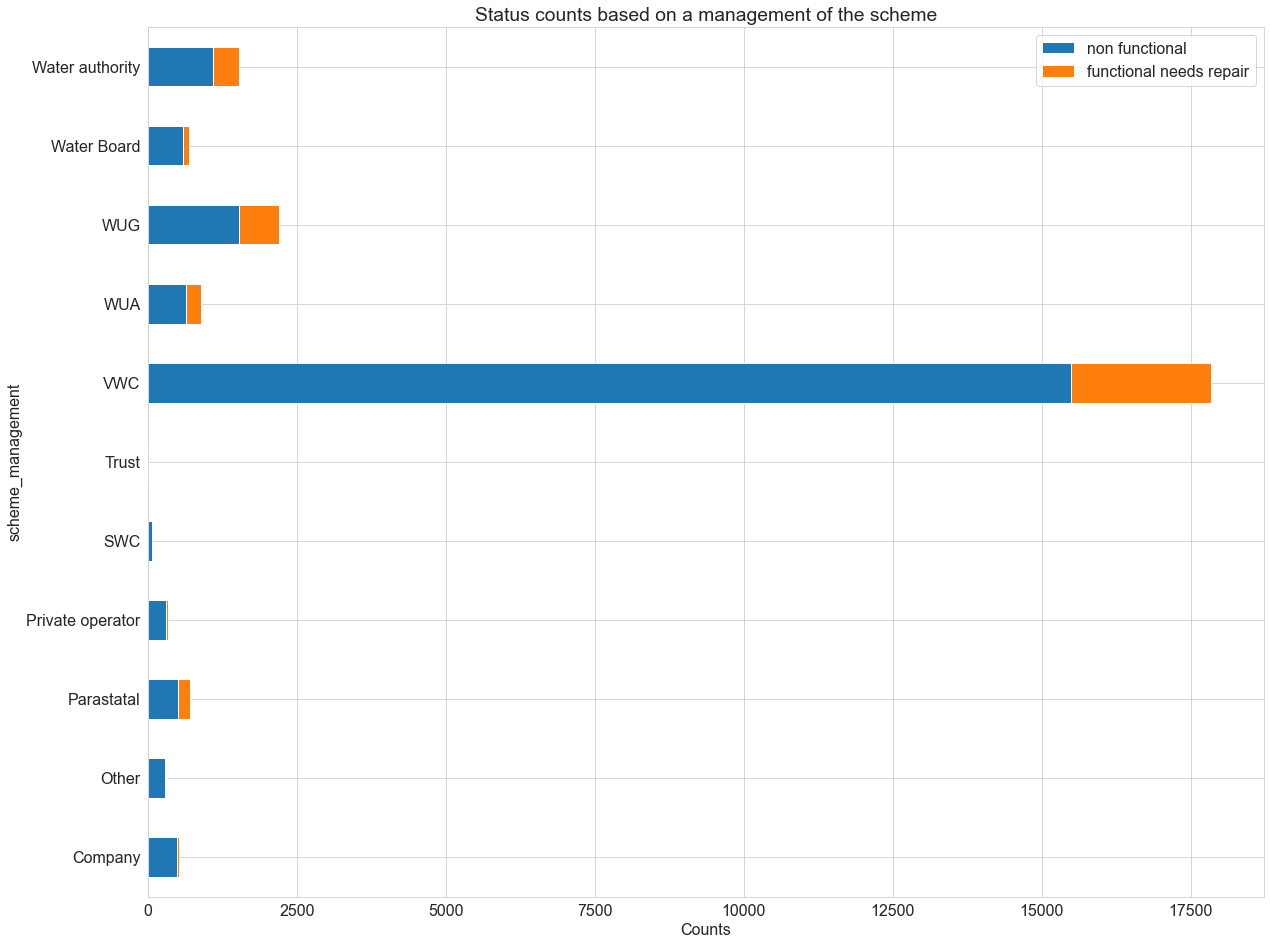

In [27]:
scheme_management_non_functional = dataframer('scheme_management', 'non functional', 'scheme_management')
scheme_management_needs_repair = dataframer('scheme_management', 'functional needs repair', 'scheme_management')

merged_scheme_managemenet_df = df_meger([scheme_management_non_functional, scheme_management_needs_repair])

fig, ax = plt.subplots(figsize=(20,16))
merged_scheme_managemenet_df.plot(kind='barh', stacked=True, ax=ax)
ax.set_xlabel('Counts')
plt.title('Status counts based on a management of the scheme')
plt.show()

Water pointd manged by VWC (village water commette) seem to have the greatest number of functional but need to be repaired water points.

### Invsetingating if management group has effect on the status of a water point.

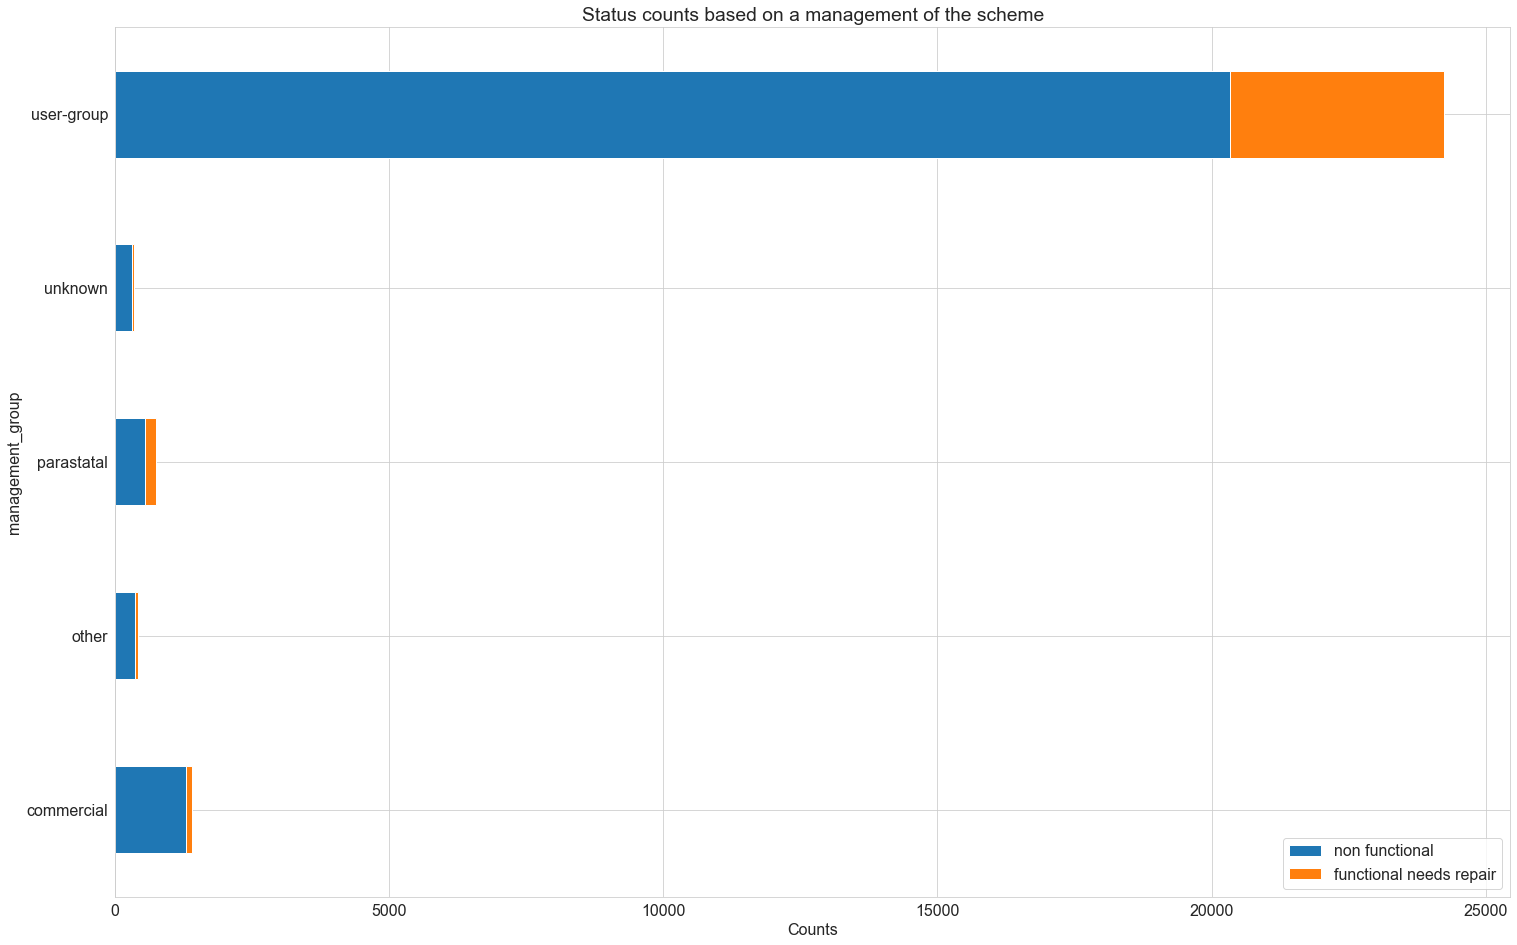

In [28]:
management_group_non_functional = dataframer('management_group', 'non functional', 'management_group')
management_group_needs_repair = dataframer('management_group', 'functional needs repair', 'management_group')

merged_group_df = df_meger([management_group_non_functional, management_group_needs_repair])

fig, ax = plt.subplots(figsize=(25,16))
merged_group_df.plot(kind='barh', stacked=True, ax=ax)
ax.set_xlabel('Counts')
plt.title('Status counts based on a management of the scheme')
plt.show()

User group has the highest number of non functional but repairable wells.

### Invsetingating if extraction type has effect of the condition of a well

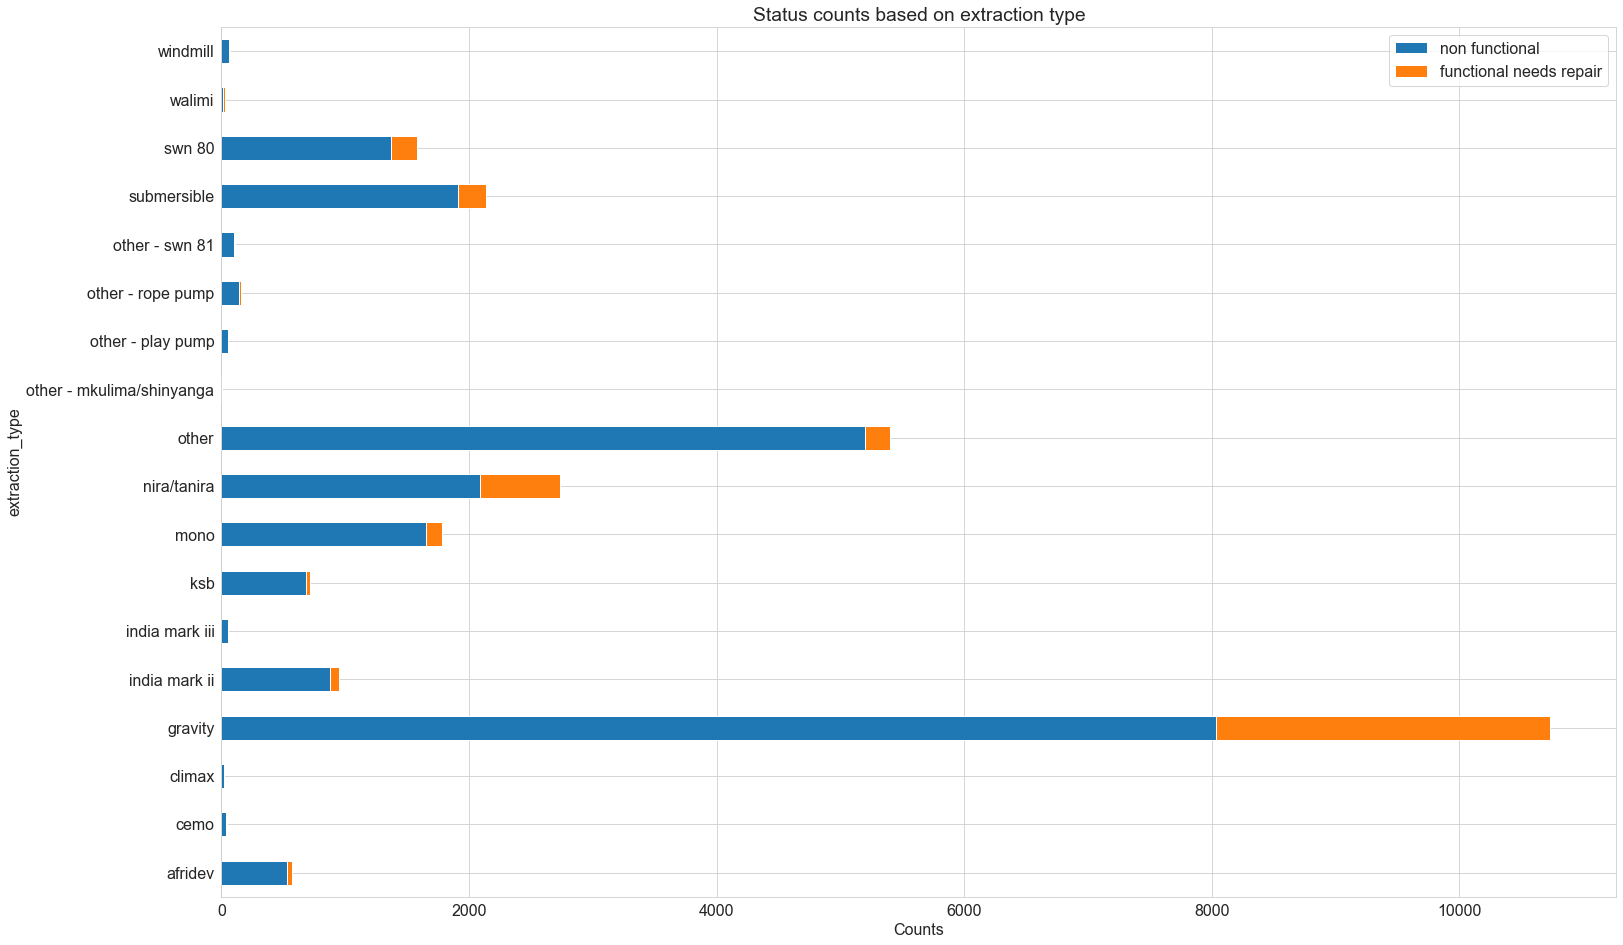

In [29]:
exctraction_type_non_functional = dataframer('extraction_type', 'non functional', 'extraction_type')
exctraction_type_needs_repair = dataframer('extraction_type', 'functional needs repair', 'extraction_type')

merged_extraction_type_df = df_meger([exctraction_type_non_functional, exctraction_type_needs_repair])

fig, ax = plt.subplots(figsize=(25,16))
merged_extraction_type_df.plot(kind='barh', stacked=True, ax=ax)
ax.set_xlabel('Counts')
plt.title('Status counts based on extraction type')
plt.show()

Mono has the largest number of non funtional water points. The wells which extraction is gravity have the highest number of funtional water points and also funtional byt needs repair wells.

Invsetingating if extraction type class prevides more info than extraction type.

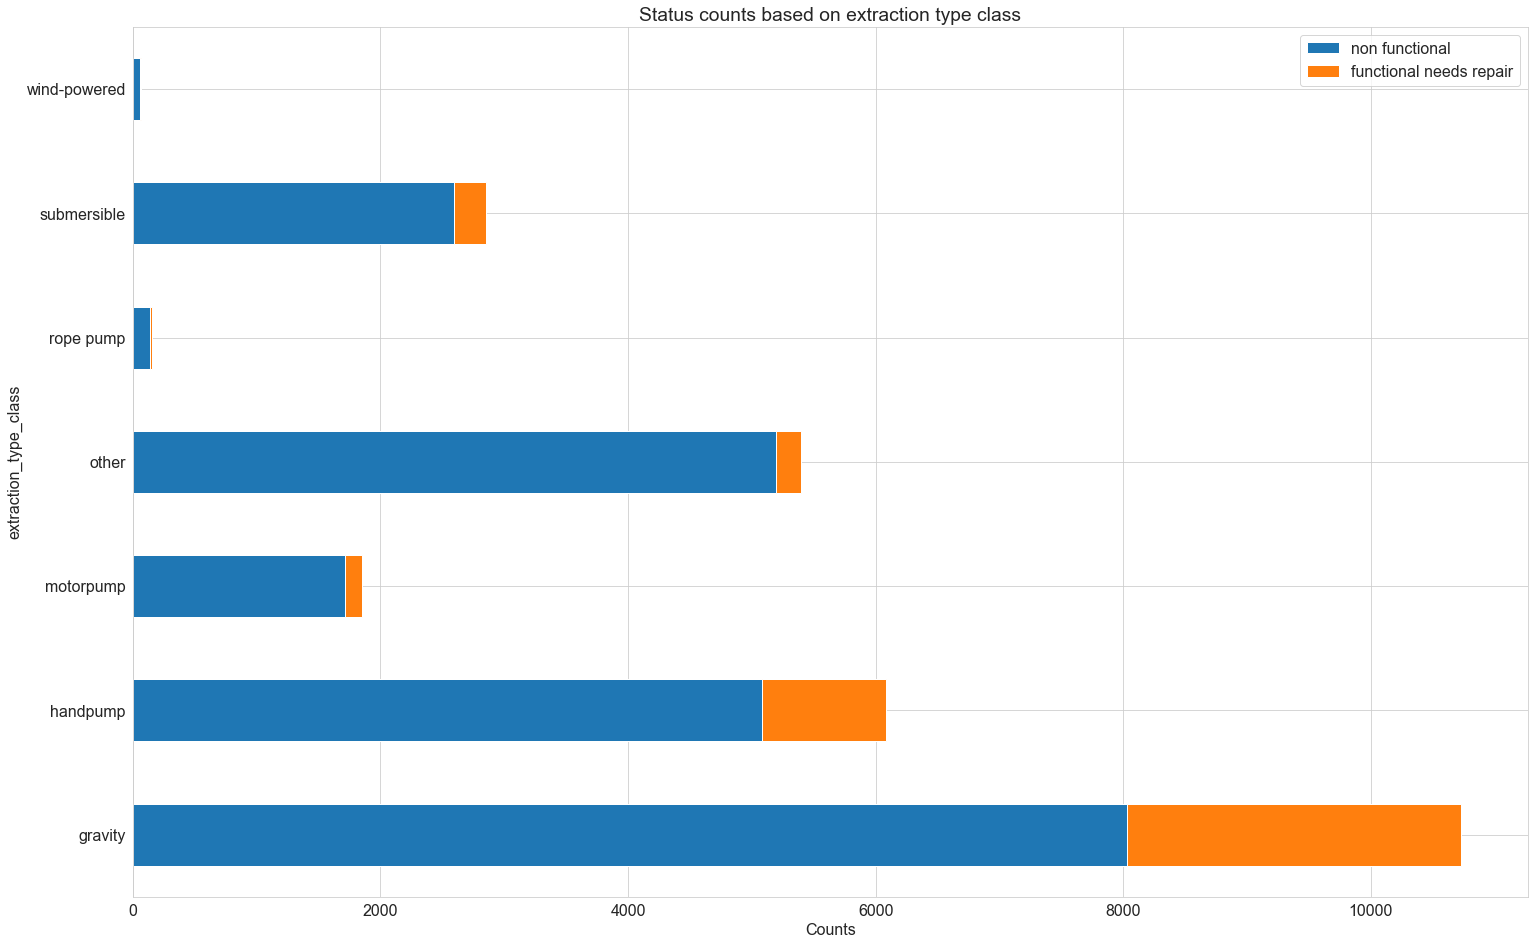

In [30]:
exctraction_type_class_non_functional = dataframer('extraction_type_class', 'non functional', 'extraction_type_class')
exctraction_type_class_needs_repair = dataframer('extraction_type_class', 'functional needs repair', 'extraction_type_class')

merged_extraction_type_class_df = df_meger([exctraction_type_class_non_functional, exctraction_type_class_needs_repair])

fig, ax = plt.subplots(figsize=(25,16))
merged_extraction_type_class_df.plot(kind='barh', stacked=True, ax=ax)
ax.set_xlabel('Counts')
plt.title('Status counts based on extraction type class')
plt.show()

Well the hypothesis is true, extraction type class does display more info

### Invsetingating if permit has an effect to the status condition of a well

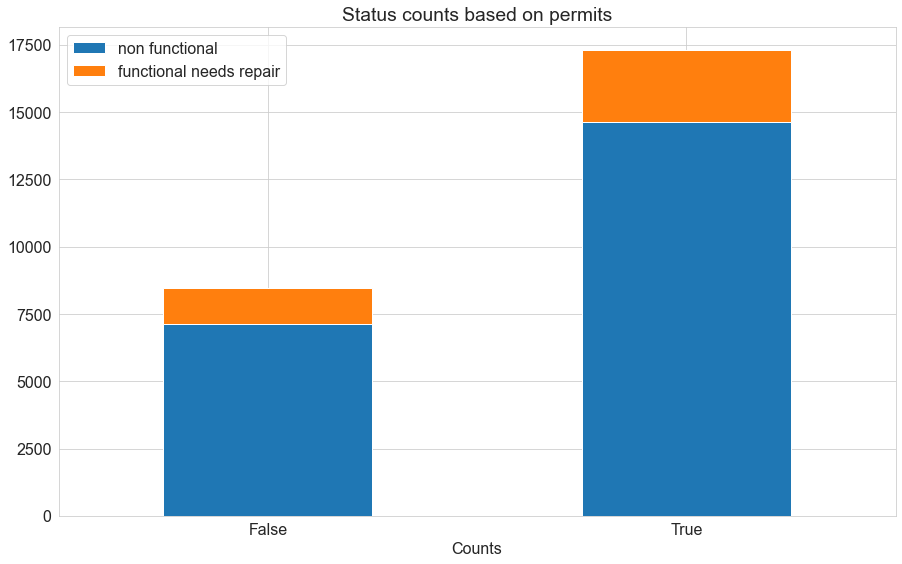

In [31]:
permit_non_functional = dataframer('permit', 'non functional', 'permit')
permit_needs_repair = dataframer('permit', 'functional needs repair', 'permit')

merged_permit_df = df_meger([permit_non_functional, permit_needs_repair])

fig, ax = plt.subplots(figsize=(15,9))
merged_permit_df.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Counts')
plt.xticks(rotation=360)
plt.title('Status counts based on permits')
plt.show()

Wells with permits are many and have a high number of functional but need repair water points.